### 导入基础包

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

### 导入决策树package

In [2]:
from sklearn.tree import DecisionTreeClassifier

In [4]:
mpl.rcParams['font.sans-serif'] = [u'simHei']
mpl.rcParams['axes.unicode_minus'] = False

### 读取数据

In [5]:
iris_feature = u'花萼长度', u'花萼宽度', u'花瓣长度', u'花瓣宽度'
path = 'datas/iris.data'
data = pd.read_csv(path,header = None)
data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
x_prime = data[list(range(4))]
x_prime.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
y = pd.Categorical(data[4]).codes
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int8)

# 不同特征组合分类效果

特征： 花萼长度 + 花萼宽度
	预测正确数目：： 127
	准确率：84.67%
特征： 花萼长度 + 花瓣长度
	预测正确数目：： 148
	准确率：98.67%
特征： 花萼长度 + 花瓣宽度
	预测正确数目：： 146
	准确率：97.33%
特征： 花萼宽度 + 花瓣长度
	预测正确数目：： 146
	准确率：97.33%
特征： 花萼宽度 + 花瓣宽度
	预测正确数目：： 145
	准确率：96.67%
特征： 花瓣长度 + 花瓣宽度
	预测正确数目：： 149
	准确率：99.33%


<function matplotlib.pyplot.show(*args, **kw)>

C:\Users\Administrator\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


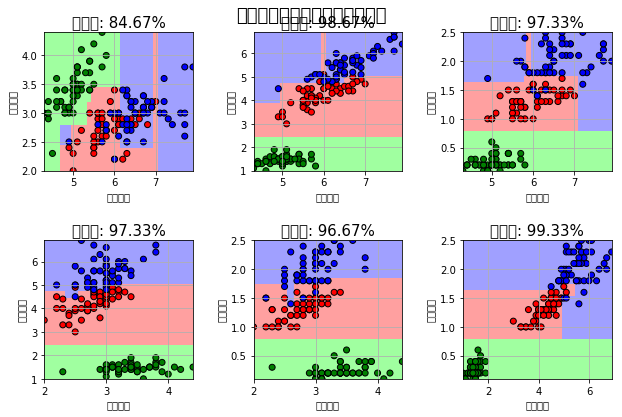

In [20]:
#进行特征比较
feature_pairs = [[0,1],[0,2],[0,3],[1,2],[1,3],[2,3]]
plt.figure(figsize=(9,6),facecolor = 'w')

for i,pair in enumerate(feature_pairs):
    #获取x
    x = x_prime[pair]
    
    #训练
    clf = DecisionTreeClassifier(criterion='gini',max_depth=5)
    clf.fit(x,y)
    
    #获得预测值
    y_hat = clf.predict(x)
    
    #打印拟合效果
    score = clf.score(x,y)
    y2 = y.reshape(-1)
    c = np.count_nonzero(y_hat == y )  # 统计预测正确的个数
    print('特征：',iris_feature[pair[0]],'+',iris_feature[pair[1]])
    print('\t预测正确数目：：',c)
    print('\t准确率：%.2f%%' %(score*100))
    
    #绘制不同颜色区域
    N,M = 500,500
    x1_min,x2_min = x.min()
    x1_max,x2_max = x.max()
    t1 = np.linspace(x1_min,x1_max,N)
    t2 = np.linspace(x2_min,x2_max,M)
    x1,x2 = np.meshgrid(t1,t2)  #生成网格采样点
    x_test = np.dstack((x1.flat,x2.flat))[0]
    
    #进行可视化
    cm_light = mpl.colors.ListedColormap(['#A0FFA0','#FFA0A0','#A0A0FF'])
    cm_dark = mpl.colors.ListedColormap(['g','r','b'])
    
    #获取预测值
    y_hat = clf.predict(x_test)
    y_hat = y_hat.reshape(x1.shape)
    
    #绘图
    plt.subplot(2,3,i+1)
    plt.pcolormesh(x1,x2,y_hat,cmap=cm_light)  #预测值
    plt.scatter(x[pair[0]],x[pair[1]],c=y,edgecolors='k' , cmap = cm_dark)
    #样本散点
    plt.xlabel(iris_feature[pair[0]],fontsize=10)
    plt.ylabel(iris_feature[pair[1]],fontsize=10)
    plt.xlim(x1_min,x1_max)
    plt.ylim(x2_min,x2_max)
    plt.grid()
    plt.title(u'准确率: %.2f%%' % (score*100), fontdict={'fontsize':15})
    
plt.suptitle(u'不同特征组合对目标属性的影响',fontsize = 18)
plt.tight_layout(2)
plt.subplots_adjust(top=0.92)
plt.show
        
    
    
    